In [3]:
import os
import re
import pandas as pd

# --- Define constants for physical unit conversion ---
boxsize_mpc_h = 500.0
grid_size = 300.0
cell_size_mpc_h = boxsize_mpc_h / grid_size

# --- CORRECTED: Using the specific directory path from your original script ---
directory = "/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/output1/Shapefinder_stat/entire_box/"

# Initialize a list to store the processed data
data = []

# This regular expression robustly finds the redshift number in any filename
redshift_pattern = re.compile(r'z(\d+\.\d+)_')

print(f"Searching for files in: {directory}")

if not os.path.isdir(directory):
    print(f"Error: Directory not found at '{directory}'")
else:
    for filename in os.listdir(directory):
        # Check if the filename contains the redshift pattern
        match = redshift_pattern.search(filename)
        
        if match:
            try:
                redshift = float(match.group(1))
                print(f"  + Processing {filename} for z={redshift}")
                filepath = os.path.join(directory, filename)
                
                with open(filepath, 'r') as file:
                    # Loop through every line to read all clusters in the file
                    for line in file:
                        line = line.strip()
                        if not line:
                            continue

                        values = line.split()
                        
                        if len(values) < 11: # Ensure we have enough columns for our calculations
                            continue
                            
                        # L,B,T are calculated from the 9th, 10th, and 11th columns (indices 8, 9, 10)
                        raw_sf1 = abs(float(values[8]))
                        raw_sf2 = abs(float(values[9]))
                        raw_sf3 = abs(float(values[10]))
                        
                        L_grid = max(raw_sf1, raw_sf2, raw_sf3)
                        T_grid = min(raw_sf1, raw_sf2, raw_sf3)
                        B_grid = (raw_sf1 + raw_sf2 + raw_sf3) - L_grid - T_grid
                        
                        # Recalculate P and F based on the corrected L, B, T
                        sum_bt = B_grid + T_grid
                        sum_lb = L_grid + B_grid
                        P_val = 0 if sum_bt == 0 else (B_grid - T_grid) / sum_bt
                        F_val = 0 if sum_lb == 0 else (L_grid - B_grid) / sum_lb

                        # --- FINAL CORRECTED COLUMN ASSIGNMENTS ---
                        data.append({
                            'redshift': redshift,
                            'Volume_phys': float(values[2]) * (cell_size_mpc_h ** 3),
                            'Area_phys': float(values[3]) * (cell_size_mpc_h ** 2),
                            'Genus': float(values[5]),      # Corrected: Genus is the 6th column (index 5)
                            'IMC_phys': float(values[6]) * cell_size_mpc_h,  # Corrected: IMC is the 7th column (index 6)
                            'L_phys': L_grid * cell_size_mpc_h,
                            'B_phys': B_grid * cell_size_mpc_h,
                            'T_phys': T_grid * cell_size_mpc_h,
                            'P': P_val,
                            'F': F_val,
                        })
            except Exception as e:
                print(f"  - Error processing {filename}: {e}")

if not data:
    print("\nNo data was processed. Please check the directory path and filenames.")
else:
    # Create DataFrame and save to CSV
    df = pd.DataFrame(data)
    # --- CORRECTED: Using the specific output filename from your original script ---
    output_filename = 'CD_OD1_SF_EB.csv'
    df.to_csv(output_filename, index=False)
    print(f"\nProcessing complete. Corrected data for {len(df['redshift'].unique())} redshifts saved to '{output_filename}'")

Searching for files in: /home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/output1/Shapefinder_stat/entire_box/
  + Processing Shapefinders_copy._z12.903000_scen0_subbox0 for z=12.903
  + Processing Shapefinders_copy._z12.318000_scen0_subbox0 for z=12.318
  + Processing Shapefinders_copy._z10.290000_scen0_subbox0 for z=10.29
  + Processing Shapefinders_copy._z11.090000_scen0_subbox0 for z=11.09
  + Processing Shapefinders_copy._z11.791000_scen0_subbox0 for z=11.791
  + Processing Shapefinders_copy._z17.848000_scen0_subbox0 for z=17.848
  + Processing Shapefinders_copy._z19.298000_scen0_subbox0 for z=19.298
  + Processing Shapefinders_copy._z16.095000_scen0_subbox0 for z=16.095
  + Processing Shapefinders_copy._z11.546000_scen0_subbox0 for z=11.546
  + Processing Shapefinders_copy._z15.132000_scen0_subbox0 for z=15.132
  + Processing Shapefinders_copy._z10.877000_scen0_subbox0 for z=10.877
  + Processing Shapefinders_copy._z10.673000_scen0_subbox0 for z=10.673
  + Proces

In [ ]:
import os
import re
import pandas as pd

# --- Define constants for physical unit conversion ---
boxsize_mpc_h = 500.0
grid_size = 300.0
cell_size_mpc_h = boxsize_mpc_h / grid_size

# --- Using the specific directory path from your script ---
directory = "/home/amnkmr/SIP/LCS_data/data-team5/output_CD_underdensity_SURFGEN/output1/Shapefinder_stat/entire_box/"

# Initialize a list to store the processed data
data = []

# --- CORRECTED: Using a robust regular expression to find all files ---
redshift_pattern = re.compile(r'z(\d+\.\d+)_')

print(f"Searching for files in: {directory}")

if not os.path.isdir(directory):
    print(f"Error: Directory not found at '{directory}'")
else:
    for filename in os.listdir(directory):
        # Check if the filename contains the redshift pattern
        match = redshift_pattern.search(filename)
        
        if match:
            try:
                # Extract the redshift number
                redshift = float(match.group(1))
                print(f"  + Processing {filename} for z={redshift}")
                filepath = os.path.join(directory, filename)
                
                with open(filepath, 'r') as file:
                    # Loop through every line to read all clusters in the file
                    for line in file:
                        line = line.strip()
                        if not line:
                            continue

                        values = line.split()
                        
                        if len(values) < 11: # Ensure we have enough columns
                            continue
                            
                        # L,B,T are calculated from the 9th, 10th, and 11th columns (indices 8, 9, 10)
                        raw_sf1 = abs(float(values[8]))
                        raw_sf2 = abs(float(values[9]))
                        raw_sf3 = abs(float(values[10]))
                        
                        L_grid = max(raw_sf1, raw_sf2, raw_sf3)
                        T_grid = min(raw_sf1, raw_sf2, raw_sf3)
                        B_grid = (raw_sf1 + raw_sf2 + raw_sf3) - L_grid - T_grid
                        
                        # Recalculate P and F 
                        sum_bt = B_grid + T_grid
                        sum_lb = L_grid + B_grid
                        P_val = 0 if sum_bt == 0 else (B_grid - T_grid) / sum_bt
                        F_val = 0 if sum_lb == 0 else (L_grid - B_grid) / sum_lb

                        # --- FINAL CORRECTED COLUMN ASSIGNMENTS ---
                        data.append({
                            'redshift': redshift,
                            'Volume_phys': float(values[2]) * (cell_size_mpc_h ** 3),
                            'Area_phys': float(values[3]) * (cell_size_mpc_h ** 2),
                            'Genus': float(values[5]),      # Corrected: Genus is the 6th column (index 5)
                            'IMC_phys': float(values[6]) * cell_size_mpc_h,  # Corrected: IMC is the 7th column (index 6)
                            'L_phys': L_grid * cell_size_mpc_h,
                            'B_phys': B_grid * cell_size_mpc_h,
                            'T_phys': T_grid * cell_size_mpc_h,
                            'P': P_val,
                            'F': F_val,
                        })
            except Exception as e:
                print(f"  - Error processing {filename}: {e}")

if not data:
    print("\nNo data was processed. Please check the directory path and filenames.")
else:
    # Create DataFrame and save to CSV
    df = pd.DataFrame(data)
    # --- Using the specific output filename from your script ---
    output_filename = 'CD_UD1_SF_EB.csv'
    df.to_csv(output_filename, index=False)
    print(f"\nProcessing complete. Corrected data for {len(df['redshift'].unique())} redshifts saved to '{output_filename}'")


Combined plot saved as 'figure6_complete.png'


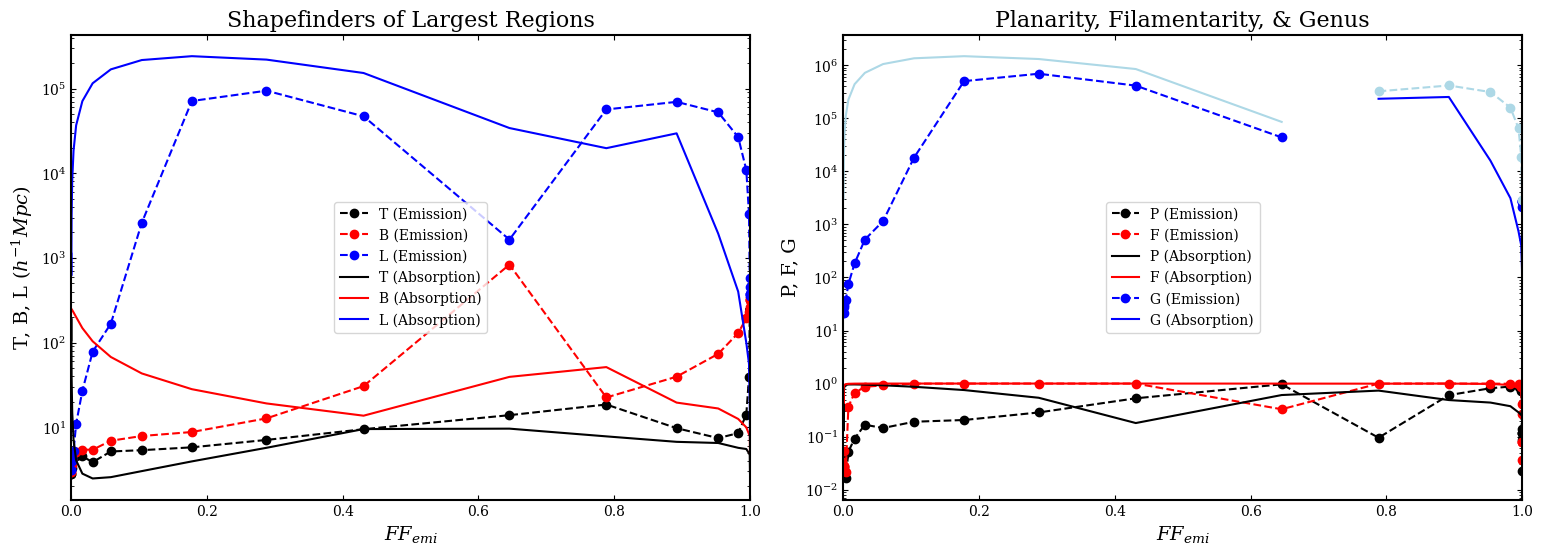

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Set plot style to closely match the publication ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1.5

# --- File Paths ---
overdense_sf_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/CD_OD1_SF_EB.csv'
underdense_sf_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/CD_UD1_SF_EB.csv'
overdense_cs_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/output1/Cluster_stat/entire_box/CD_OD1_CS_EB.csv'

def get_plot_data(sf_filepath, ff_filepath):
    """
    Loads, processes, and merges shapefinder and cluster_stat data.
    """
    try:
        df_all_clusters = pd.read_csv(sf_filepath)
        df_ff = pd.read_csv(ff_filepath)
        
        df_all_clusters.columns = df_all_clusters.columns.str.strip()
        df_ff.columns = df_ff.columns.str.strip()

    except FileNotFoundError as e:
        print(f"Error: Missing file: {e.filename}")
        return None

    # Round redshift to prevent merge errors due to float precision
    df_all_clusters['redshift'] = df_all_clusters['redshift'].round(5)
    df_ff['redshift'] = df_ff['redshift'].round(5)
    
    idx = df_all_clusters.groupby(['redshift'])['Volume_phys'].idxmax()
    df_largest_clusters = df_all_clusters.loc[idx]
    df_ff = df_ff.rename(columns={'FF': 'FF_emi'})
    df_final = pd.merge(df_largest_clusters, df_ff[['redshift', 'FF_emi']], on='redshift')
    return df_final.sort_values('FF_emi')

# --- Generate the final dataframes for plotting ---
df_emission = get_plot_data(overdense_sf_file, overdense_cs_file)
df_absorption = get_plot_data(underdense_sf_file, overdense_cs_file)

if df_emission is None or df_absorption is None:
    print("Could not generate plots due to missing files.")
else:
    # --- Create a single figure with two subplots (1 row, 2 columns) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.tight_layout(pad=4.0)

    # --- Plot 1: Middle Panel (T, B, L) on the first subplot (ax1) ---
    ax1.plot(df_emission['FF_emi'], df_emission['T_phys'], marker='o', linestyle='--', color='black', label='T (Emission)')
    ax1.plot(df_emission['FF_emi'], df_emission['B_phys'], marker='o', linestyle='--', color='red', label='B (Emission)')
    ax1.plot(df_emission['FF_emi'], df_emission['L_phys'], marker='o', linestyle='--', color='blue', label='L (Emission)')

    ax1.plot(df_absorption['FF_emi'], df_absorption['T_phys'], linestyle='-', color='black', label='T (Absorption)')
    ax1.plot(df_absorption['FF_emi'], df_absorption['B_phys'], linestyle='-', color='red', label='B (Absorption)')
    ax1.plot(df_absorption['FF_emi'], df_absorption['L_phys'], linestyle='-', color='blue', label='L (Absorption)')

    ax1.set_xlabel('$FF_{emi}$', fontsize=14)
    ax1.set_ylabel('T, B, L ($h^{-1}Mpc$)', fontsize=14)
    ax1.set_title('Shapefinders of Largest Regions', fontsize=16)
    ax1.set_yscale('log')
    ax1.set_xlim(0, 1)
    ax1.legend()

    # --- Plot 2: Right Panel (P, F, G) on the second subplot (ax2) ---
    ax2.plot(df_emission['FF_emi'], df_emission['P'], marker='o', linestyle='--', color='black', label='P (Emission)')
    ax2.plot(df_emission['FF_emi'], df_emission['F'], marker='o', linestyle='--', color='red', label='F (Emission)')
    ax2.plot(df_absorption['FF_emi'], df_absorption['P'], linestyle='-', color='black', label='P (Absorption)')
    ax2.plot(df_absorption['FF_emi'], df_absorption['F'], linestyle='-', color='red', label='F (Absorption)')

    # --- CORRECTED PLOTTING LOGIC FOR GENUS using masked arrays ---
    # Emission Genus
    y_genus_emi = df_emission['Genus'].values
    y_genus_emi_pos = np.ma.masked_where(y_genus_emi < 0, y_genus_emi)
    y_genus_emi_neg = np.ma.masked_where(y_genus_emi >= 0, np.abs(y_genus_emi))
    ax2.plot(df_emission['FF_emi'], y_genus_emi_pos, marker='o', linestyle='--', color='blue', label='G (Emission)')
    ax2.plot(df_emission['FF_emi'], y_genus_emi_neg, marker='o', linestyle='--', color='lightblue')
    
    # Absorption Genus
    y_genus_abs = df_absorption['Genus'].values
    y_genus_abs_pos = np.ma.masked_where(y_genus_abs < 0, y_genus_abs)
    y_genus_abs_neg = np.ma.masked_where(y_genus_abs >= 0, np.abs(y_genus_abs))
    ax2.plot(df_absorption['FF_emi'], y_genus_abs_pos, linestyle='-', color='blue', label='G (Absorption)')
    ax2.plot(df_absorption['FF_emi'], y_genus_abs_neg, linestyle='-', color='lightblue')
    
    # Formatting for the second plot
    ax2.set_xlabel('$FF_{emi}$', fontsize=14)
    ax2.set_ylabel('P, F, G', fontsize=14)
    ax2.set_title('Planarity, Filamentarity, & Genus', fontsize=16)
    ax2.set_yscale('log')
    ax2.set_xlim(0, 1)
    ax2.legend()
    
    # --- Save the combined figure ---
    plt.savefig('figure6_complete.png', dpi=300)
    print("\nCombined plot saved as 'figure6_complete.png'")
    plt.show()


Corrected plot saved as 'figure7_final_corrected.png'


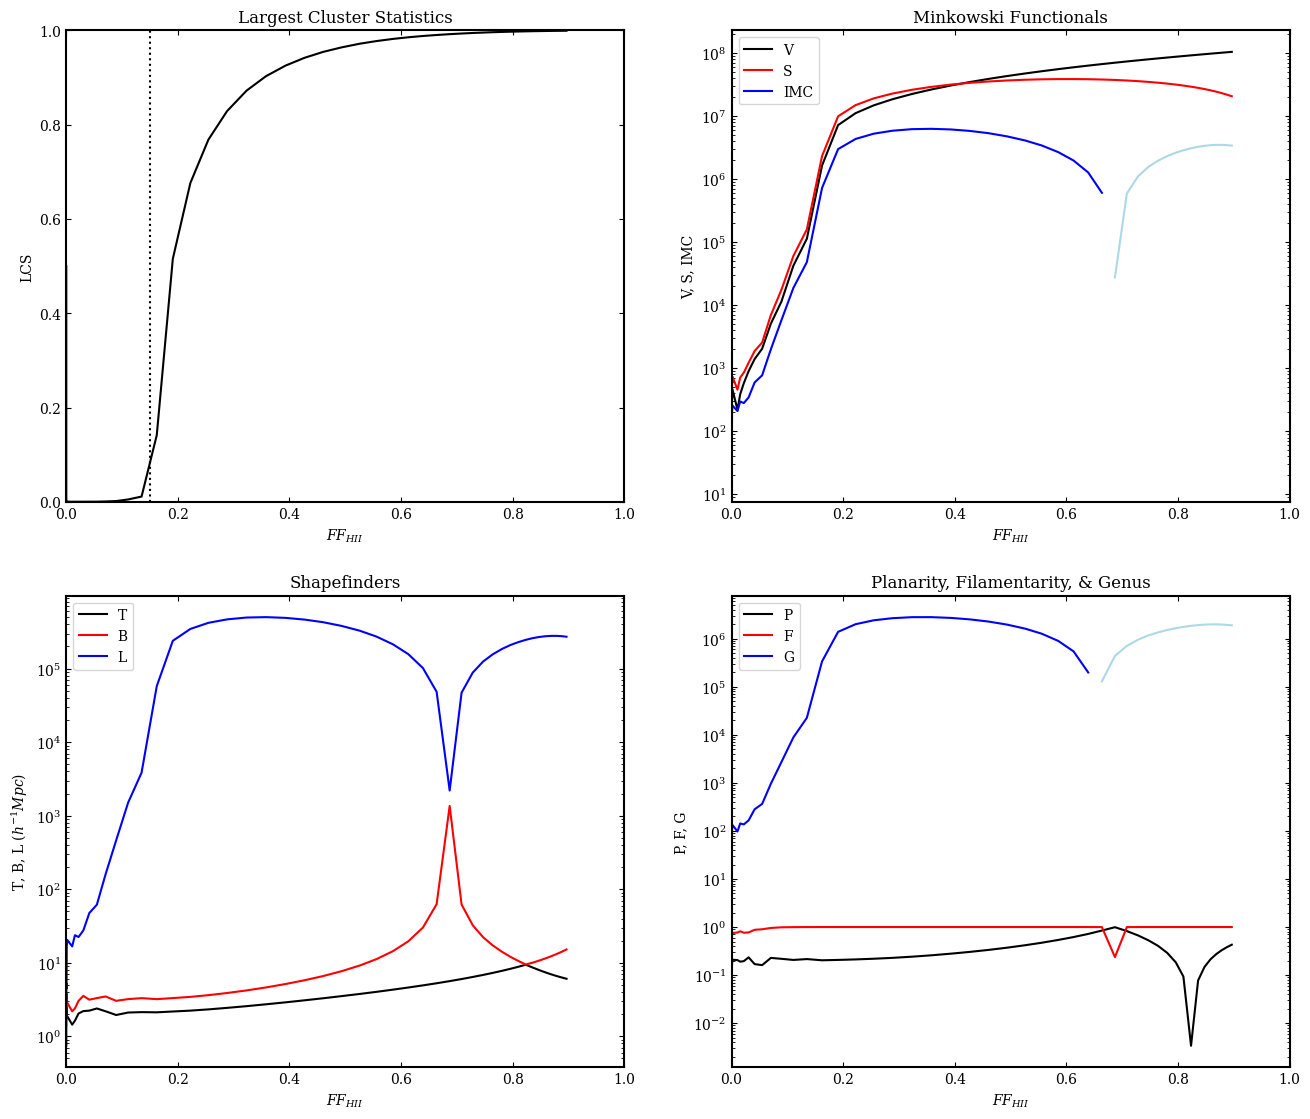

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Set plot style ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1.5

# --- File Paths ---
# Use the newly created correct file
eor_sf_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_EOR_overdensity_SURFGEN/output1/Shapefinder_stat/entire_box/EOR_OD1_SF_EB.csv'
eor_cs_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_EOR_overdensity_SURFGEN/output1/Cluster_stat/entire_box/EOR_OD1_CS_EB.csv' 

def get_eor_plot_data(sf_filepath, cs_filepath):
    try:
        df_all_clusters = pd.read_csv(sf_filepath)
        df_cs = pd.read_csv(cs_filepath)
        df_all_clusters.columns = df_all_clusters.columns.str.strip()
        df_cs.columns = df_cs.columns.str.strip()
    except FileNotFoundError as e:
        print(f"Error: Missing file: {e.filename}")
        return None, None

    df_all_clusters['redshift'] = df_all_clusters['redshift'].round(5)
    df_cs['redshift'] = df_cs['redshift'].round(5)

    df_cs = df_cs.rename(columns={'FF': 'FF_HII', 'LCS': 'LCS'})
    idx = df_all_clusters.groupby(['redshift'])['Volume_phys'].idxmax()
    df_largest_clusters = df_all_clusters.loc[idx]
    df_final = pd.merge(df_largest_clusters, df_cs[['redshift', 'FF_HII']], on='redshift')
    
    if df_final.empty:
        print("CRITICAL ERROR: Merge failed.")
        return None, None
    
    return df_final.sort_values('FF_HII'), df_cs.sort_values('FF_HII')

df_plot_data, df_lcs_data = get_eor_plot_data(eor_sf_file, eor_cs_file)

if df_plot_data is not None and df_lcs_data is not None:
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.tight_layout(pad=5.0)

    # Panel 1: LCS
    ax1 = axes[0, 0]
    ax1.plot(df_lcs_data['FF_HII'], df_lcs_data['LCS'], color='black', linestyle='-')
    ax1.set(xlabel='$FF_{HII}$', ylabel='LCS', xlim=(0, 1), ylim=(0, 1), title='Largest Cluster Statistics')
    ax1.axvline(x=0.15, color='black', linestyle=':', linewidth=1.5)
    ax1.set(xlabel='$FF_{HII}$', ylabel='LCS', xlim=(0, 1), ylim=(0, 1), title='Largest Cluster Statistics')

    # Panel 2: V, S, IMC
    ax2 = axes[0, 1]
    ax2.plot(df_plot_data['FF_HII'], df_plot_data['Volume_phys'], color='black', label='V')
    ax2.plot(df_plot_data['FF_HII'], df_plot_data['Area_phys'], color='red', label='S')
    y_imc = df_plot_data['IMC_phys'].values
    y_imc_pos = np.ma.masked_where(y_imc < 0, y_imc)
    y_imc_neg = np.ma.masked_where(y_imc >= 0, np.abs(y_imc))
    ax2.plot(df_plot_data['FF_HII'], y_imc_pos, color='blue', label='IMC')
    ax2.plot(df_plot_data['FF_HII'], y_imc_neg, color='lightblue')
    ax2.set(xlabel='$FF_{HII}$', ylabel='V, S, IMC', xlim=(0, 1), title='Minkowski Functionals', yscale='log')
    ax2.legend()
    
    # Panel 3: T, B, L
    ax3 = axes[1, 0]
    ax3.plot(df_plot_data['FF_HII'], df_plot_data['T_phys'], color='black', label='T')
    ax3.plot(df_plot_data['FF_HII'], df_plot_data['B_phys'], color='red', label='B')
    ax3.plot(df_plot_data['FF_HII'], df_plot_data['L_phys'], color='blue', label='L')
    ax3.set(xlabel='$FF_{HII}$', ylabel='T, B, L ($h^{-1}Mpc$)', xlim=(0, 1), title='Shapefinders', yscale='log')
    ax3.legend()

    # Panel 4: P, F, G
    ax4 = axes[1, 1]
    ax4.plot(df_plot_data['FF_HII'], df_plot_data['P'], color='black', label='P')
    ax4.plot(df_plot_data['FF_HII'], df_plot_data['F'], color='red', label='F')
    y_genus = df_plot_data['Genus'].values
    y_genus_pos = np.ma.masked_where(y_genus < 0, y_genus)
    y_genus_neg = np.ma.masked_where(y_genus >= 0, np.abs(y_genus))
    ax4.plot(df_plot_data['FF_HII'], y_genus_pos, color='blue', label='G')
    ax4.plot(df_plot_data['FF_HII'], y_genus_neg, color='lightblue')
    ax4.set(xlabel='$FF_{HII}$', ylabel='P, F, G', xlim=(0, 1), title='Planarity, Filamentarity, & Genus', yscale='log')
    ax4.legend()

    plt.savefig('figure7_final_corrected.png', dpi=300)
    print("\nCorrected plot saved as 'figure7_final_corrected.png'")
    plt.show()


Plot saved as 'figure10_reproduced_final_ylabels.png'


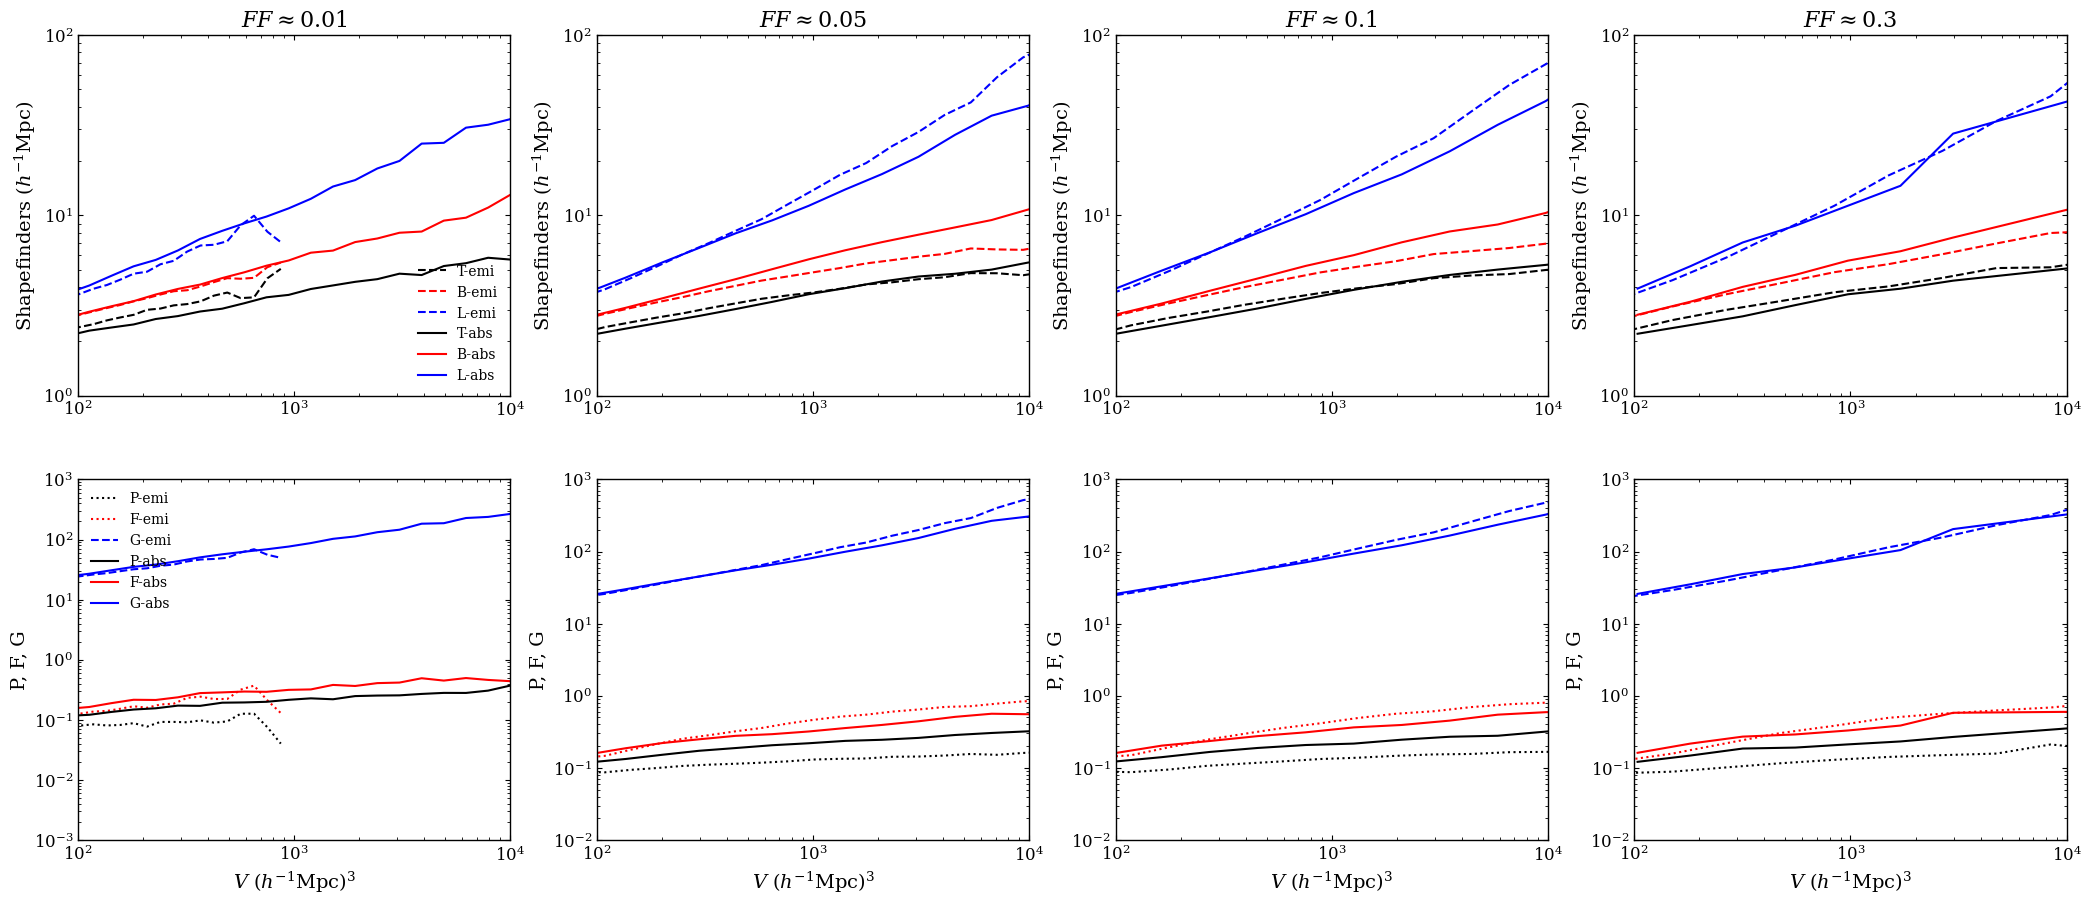

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Set plot style to match the academic paper's aesthetic ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

# --- File Paths (Corrected for the user's system) ---
overdense_sf_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/CD_OD1_SF_EB.csv'
underdense_sf_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/CD_UD1_SF_EB.csv'
overdense_cs_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_overdensity_SURFGEN/output1/Cluster_stat/entire_box/CD_OD1_CS_EB.csv'
underdense_cs_file = '/home/amnkmr/SIP/LCS_data/data-team5/output_CD_underdensity_SURFGEN/output1/Cluster_stat/entire_box/CD_UD1_CS_EB.csv'


# --- Load all necessary data ---
try:
    df_emission = pd.read_csv(overdense_sf_file)
    df_absorption = pd.read_csv(underdense_sf_file)
    df_ff_emi_map = pd.read_csv(overdense_cs_file)
    df_ff_abs_map = pd.read_csv(underdense_cs_file)

    for df in [df_emission, df_absorption, df_ff_emi_map, df_ff_abs_map]:
        df.columns = df.columns.str.strip()
        if 'redshift' in df.columns:
            df['redshift'] = df['redshift'].round(5)

except FileNotFoundError as e:
    print(f"Error: Could not find the file at the specified path: {e.filename}.")
    print("Please verify that the file paths at the top of the script are correct for your system.")
    exit()

# --- Helper Functions ---
def find_snapshot_redshift(df_ff_map, target_ff):
    """Finds the redshift of the snapshot closest to a target filling factor."""
    closest_idx = (df_ff_map['FF'] - target_ff).abs().idxmin()
    return df_ff_map.loc[closest_idx, 'redshift']

def get_binned_statistic(df, bins=25):
    """Calculates the mean of shapefinder data across logarithmic volume bins."""
    df = df[df['Volume_phys'] > 0].copy()
    if df.empty:
        return pd.DataFrame()
    
    min_vol, max_vol = np.log10(df['Volume_phys'].min()), np.log10(df['Volume_phys'].max())
    if np.isclose(min_vol, max_vol):
        return pd.DataFrame()
    
    log_bins = np.logspace(min_vol, max_vol, num=bins)
    df['vol_bin'] = pd.cut(df['Volume_phys'], bins=log_bins, right=False)
    
    binned_df = df.groupby('vol_bin', observed=True).mean(numeric_only=True)
    
    binned_df['vol_center'] = [np.sqrt(bin.left * bin.right) for bin in binned_df.index]
    return binned_df.dropna(subset=['vol_center'])

# --- Plotting Setup ---
# Note: sharey is now False to allow individual y-labels without issue.
fig, axes = plt.subplots(2, 4, figsize=(22, 10))
fig.tight_layout(pad=6.0, h_pad=4.0, w_pad=3.0)
target_ffs = [0.01, 0.05, 0.1, 0.3]

# --- Main Loop to Generate Plots ---
for i, ff_target in enumerate(target_ffs):
    z_emi = find_snapshot_redshift(df_ff_emi_map, ff_target)
    z_abs = find_snapshot_redshift(df_ff_abs_map, ff_target)
    
    emi_data_z = df_emission[df_emission['redshift'] == z_emi]
    abs_data_z = df_absorption[df_absorption['redshift'] == z_abs]
    
    emi_binned = get_binned_statistic(emi_data_z)
    abs_binned = get_binned_statistic(abs_data_z)
    
    # --- Top Panel: T, B, L vs Volume ---
    ax_top = axes[0, i]
    if not emi_binned.empty:
        ax_top.plot(emi_binned['vol_center'], emi_binned['T_phys'], linestyle='--', color='black')
        ax_top.plot(emi_binned['vol_center'], emi_binned['B_phys'], linestyle='--', color='red')
        ax_top.plot(emi_binned['vol_center'], emi_binned['L_phys'], linestyle='--', color='blue')
    if not abs_binned.empty:
        ax_top.plot(abs_binned['vol_center'], abs_binned['T_phys'], linestyle='-', color='black')
        ax_top.plot(abs_binned['vol_center'], abs_binned['B_phys'], linestyle='-', color='red')
        ax_top.plot(abs_binned['vol_center'], abs_binned['L_phys'], linestyle='-', color='blue')
    
    ax_top.set_title(f'$FF \\approx {ff_target}$', fontsize=16)
    ax_top.set_yscale('log')
    ax_top.set_xscale('log')
    ax_top.set_ylim(1e0, 1e2)
    ax_top.set_xlim(1e2, 1e4)
    # MODIFIED: Add y-label to every top-row plot
    ax_top.set_ylabel(r'Shapefinders $(h^{-1}\mathrm{Mpc})$', fontsize=14)


    # --- Bottom Panel: P, F, G vs Volume ---
    ax_bottom = axes[1, i]
    if not emi_binned.empty:
        ax_bottom.plot(emi_binned['vol_center'], emi_binned['P'], linestyle=':', color='black')
        ax_bottom.plot(emi_binned['vol_center'], emi_binned['F'], linestyle=':', color='red')
        ax_bottom.plot(emi_binned['vol_center'], abs(emi_binned['Genus']), linestyle='--', color='blue')
    if not abs_binned.empty:
        ax_bottom.plot(abs_binned['vol_center'], abs_binned['P'], linestyle='-', color='black')
        ax_bottom.plot(abs_binned['vol_center'], abs_binned['F'], linestyle='-', color='red')
        ax_bottom.plot(abs_binned['vol_center'], abs(abs_binned['Genus']), linestyle='-', color='blue')

    ax_bottom.set_xlabel(r'$V\ (h^{-1}\mathrm{Mpc})^{3}$', fontsize=14)
    ax_bottom.set_yscale('log')
    ax_bottom.set_xscale('log')
    ax_bottom.set_xlim(1e2, 1e4)
    
    if i == 0:
        ax_bottom.set_ylim(1e-3, 1e3) # Set a wider limit for the first plot
    else:
        ax_bottom.set_ylim(1e-2, 1e3)
    # MODIFIED: Add y-label to every bottom-row plot
    ax_bottom.set_ylabel(r'P, F, G', fontsize=14)


# --- Set Legends (only needed for the first plot in each row) ---
legend_handles_top = [
    Line2D([0], [0], color='black', lw=1.5, linestyle='--', label=r'T-emi'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='--', label=r'B-emi'),
    Line2D([0], [0], color='blue', lw=1.5, linestyle='--', label=r'L-emi'),
    Line2D([0], [0], color='black', lw=1.5, linestyle='-', label=r'T-abs'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='-', label=r'B-abs'),
    Line2D([0], [0], color='blue', lw=1.5, linestyle='-', label=r'L-abs'),
]
axes[0, 0].legend(handles=legend_handles_top, loc='lower right', ncol=1, frameon=False)

legend_handles_bottom = [
    Line2D([0], [0], color='black', lw=1.5, linestyle=':', label=r'P-emi'),
    Line2D([0], [0], color='red', lw=1.5, linestyle=':', label=r'F-emi'),
    Line2D([0], [0], color='blue', lw=1.5, linestyle='--', label=r'G-emi'),
    Line2D([0], [0], color='black', lw=1.5, linestyle='-', label=r'P-abs'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='-', label=r'F-abs'),
    Line2D([0], [0], color='blue', lw=1.5, linestyle='-', label=r'G-abs'),
]
axes[1, 0].legend(handles=legend_handles_bottom, loc='upper left', ncol=1, frameon=False)

# --- Save and Show the Final Figure ---
plt.savefig('figure10.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'figure10_reproduced_final_ylabels.png'")
plt.show()